<Figure size 1000x500 with 0 Axes>

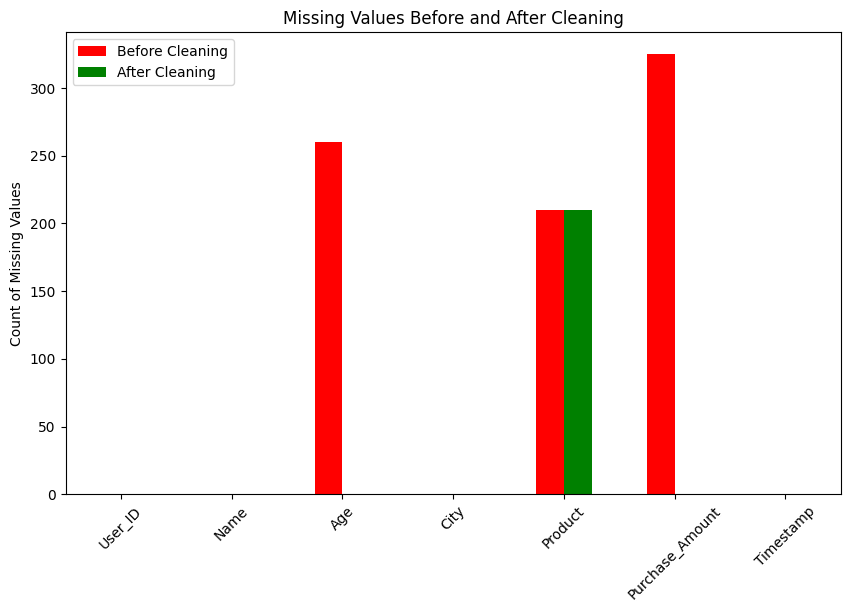

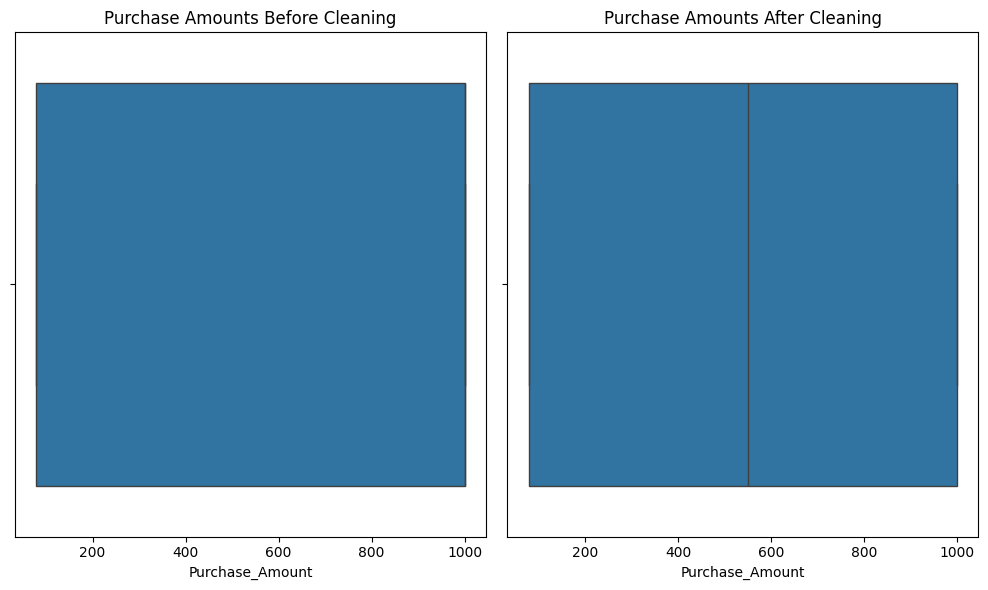

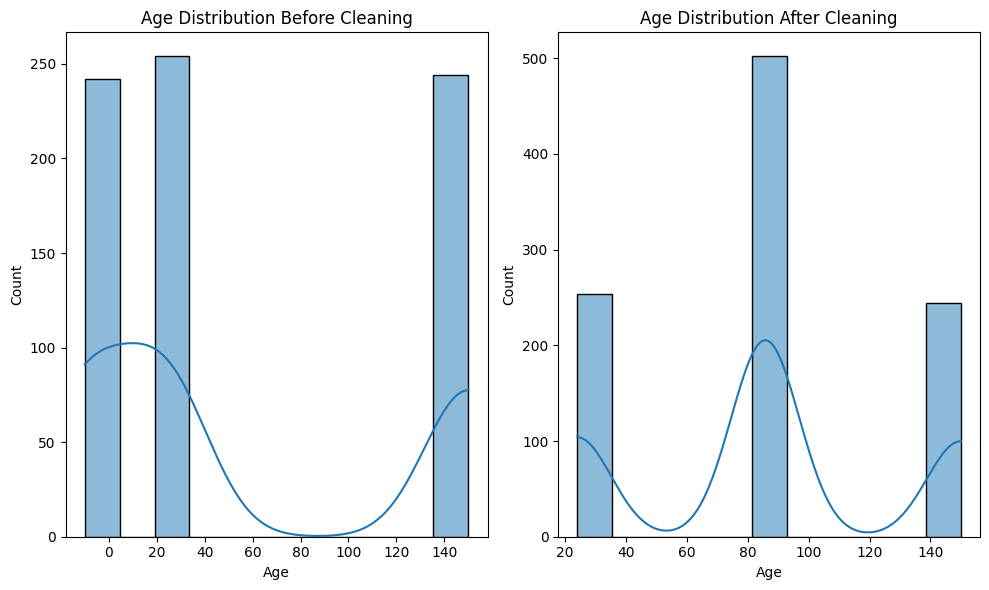

<Figure size 1000x500 with 0 Axes>

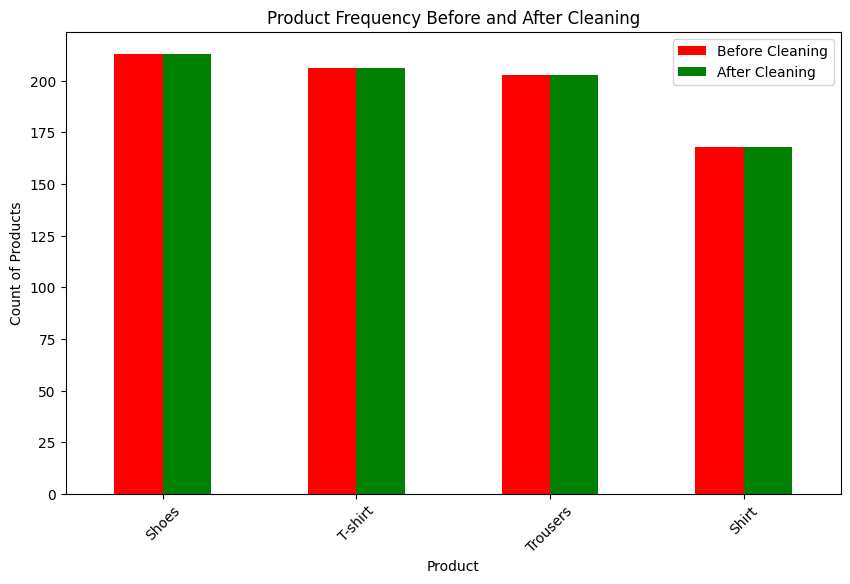

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('uncleaned_dataset_1000_rows.csv')

df_cleaned = df.drop_duplicates()

df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: x if x > 0 else np.nan)  # Fix negative ages
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].mean())  # Fill NaN with mean for Age
df_cleaned['Purchase_Amount'] = df_cleaned['Purchase_Amount'].fillna(df_cleaned['Purchase_Amount'].mean())  # Fill NaN for Purchase Amount
df_cleaned['City'] = df_cleaned['City'].fillna('Unknown')  # Fill missing City with 'Unknown'
df_cleaned['Product'] = df_cleaned['Product'].str.capitalize()  # Standardize product names (capitalize)

df_cleaned['Purchase_Amount'] = df_cleaned['Purchase_Amount'].apply(lambda x: np.nan if x > 1000 else x)

df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])


plt.figure(figsize=(10, 5))
missing_before = df.isnull().sum()                       
missing_after = df_cleaned.isnull().sum()
df_missing = pd.DataFrame({'Before Cleaning': missing_before, 'After Cleaning': missing_after})
df_missing.plot(kind='bar', figsize=(10, 6), color=['red', 'green'])
plt.title('Missing Values Before and After Cleaning')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Purchase_Amount'])
plt.title('Purchase Amounts Before Cleaning')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['Purchase_Amount'])
plt.title('Purchase Amounts After Cleaning')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution Before Cleaning')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Age'], kde=True)
plt.title('Age Distribution After Cleaning')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
product_before = df['Product'].value_counts()
product_after = df_cleaned['Product'].value_counts()
df_product = pd.DataFrame({'Before Cleaning': product_before, 'After Cleaning': product_after})
df_product.plot(kind='bar', figsize=(10, 6), color=['red', 'green'])
plt.title('Product Frequency Before and After Cleaning')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)
plt.show()


In [ ]:
/?